In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.preprocessing import maxabs_scale

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv1D
from tensorflow.keras.layers import MaxPooling1D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [ ]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [ ]:
base_dir = path.join('..', 'data')
data_dir = path.join(base_dir, 'data_speech_commands_v0.02')
 
train_txt = path.join(data_dir, 'wav_train_16words.txt')
val_txt = path.join(data_dir, 'wav_validation_16words.txt')
test_txt = path.join(data_dir, 'wav_test_16words.txt')

train_data = np.load(path.join(data_dir, 'wav_train_data.npz'))
val_data = np.load(path.join(data_dir, 'wav_validation_data.npz'))
test_data = np.load(path.join(data_dir, 'wav_test_data.npz'))

In [5]:
x_train = train_data['x_train']
y_train = train_data['y_train']
x_val = val_data['x_val']
y_val = val_data['y_val']
x_test = test_data['x_test']
y_test = test_data['y_test']
y_table = test_data['table']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table.shape

In [6]:
input_shape = x_test[0].shape
output_size = y_table.shape[0]

In [7]:
x_train_abs = np.asarray([maxabs_scale(wav) for wav in x_train])
y_train_onehot = np.asarray([to_categorical(label, output_size) for label in y_train])
del x_train, y_train

x_val_abs = np.asarray([maxabs_scale(wav) for wav in x_val])
y_val_onehot = np.asarray([to_categorical(label, output_size) for label in y_val])
del x_val, y_val

x_test_abs = np.asarray([maxabs_scale(wav) for wav in x_test])
y_test_onehot = np.asarray([to_categorical(label, output_size) for label in y_test])
del x_test, y_test

In [8]:
def build_1d_cnn_only_conv(conv_num=1):
    model=Sequential()
    model.add(Conv1D (kernel_size=25, filters=8, strides=1, padding='valid', 
                      activation='relu', input_shape=input_shape)) 
#     model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=4, strides=4, padding='same'))
    
    for i in range(conv_num-1):
        model.add(Conv1D (kernel_size=25, filters=8*(2**(i+1)), strides=1, padding='valid', 
                          activation='relu'))
#         model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=4, strides=4, padding='same'))

    model.add(Flatten())
    
#     model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax' ))
    
    return model

In [9]:
for i in range(1, 6):
    model = build_1d_cnn_only_conv(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 15976, 8)          208       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3994, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 31952)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                511248    
Total params: 511,456
Trainable params: 511,456
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 15976, 8)          208      

Train on 36805 samples, validate on 4293 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
36736/36805 [============================>.] - ETA: 0s - loss: 2.4697 - acc: 0.2267
Epoch 00001: val_loss improved from inf to 2.17973, saving model to model/checkpoint/1D_CNN_1_only_conv_checkpoint/001-2.1797.hdf5
36805/36805 [==============================] - 8s 209us/sample - loss: 2.4688 - acc: 0.2270 - val_loss: 2.1797 - val_acc: 0.3531
Epoch 2/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.9721 - acc: 0.4087
Epoch 00002: val_loss improved from 2.17973 to 1.84732, saving model to model/checkpoint/1D_CNN_1_only_conv_checkpoint/002-1.8473.hdf5
36805/36805 [==============================] - 6s 161us/sample - loss: 1.9714 - acc: 0.4089 - val_loss: 1.8473 - val_acc: 0.4496
Epoch 3/500
36544/36805 [============================>.] - ETA: 0s - loss: 1.6849 - acc: 0.4990
Epoch 00003: val_loss improved from 1.84732 to 1.67990, saving model to model/checkpoint/1D

Epoch 28/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.5511 - acc: 0.8608
Epoch 00028: val_loss did not improve from 1.52601
36805/36805 [==============================] - 6s 159us/sample - loss: 0.5516 - acc: 0.8606 - val_loss: 1.8625 - val_acc: 0.4808
Epoch 29/500
36544/36805 [============================>.] - ETA: 0s - loss: 0.5320 - acc: 0.8672
Epoch 00029: val_loss did not improve from 1.52601
36805/36805 [==============================] - 6s 157us/sample - loss: 0.5321 - acc: 0.8673 - val_loss: 1.8888 - val_acc: 0.4796
Epoch 30/500
36544/36805 [============================>.] - ETA: 0s - loss: 0.5146 - acc: 0.8748
Epoch 00030: val_loss did not improve from 1.52601
36805/36805 [==============================] - 6s 157us/sample - loss: 0.5143 - acc: 0.8750 - val_loss: 1.9096 - val_acc: 0.4782
Epoch 31/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.4944 - acc: 0.8817
Epoch 00031: val_loss did not improve from 1.52601
36805/36805 [========

Epoch 58/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1768 - acc: 0.9790
Epoch 00058: val_loss did not improve from 1.52601
36805/36805 [==============================] - 6s 160us/sample - loss: 0.1767 - acc: 0.9790 - val_loss: 2.6632 - val_acc: 0.4621
Epoch 59/500
36480/36805 [============================>.] - ETA: 0s - loss: 0.1679 - acc: 0.9818
Epoch 00059: val_loss did not improve from 1.52601
36805/36805 [==============================] - 6s 165us/sample - loss: 0.1684 - acc: 0.9816 - val_loss: 2.7004 - val_acc: 0.4594
Epoch 60/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1627 - acc: 0.9829
Epoch 00060: val_loss did not improve from 1.52601
36805/36805 [==============================] - 6s 163us/sample - loss: 0.1627 - acc: 0.9829 - val_loss: 2.7175 - val_acc: 0.4663
Epoch 61/500
36480/36805 [============================>.] - ETA: 0s - loss: 0.1577 - acc: 0.9838
Epoch 00061: val_loss did not improve from 1.52601
36805/36805 [========

Epoch 88/500
36544/36805 [============================>.] - ETA: 0s - loss: 0.0654 - acc: 0.9971
Epoch 00088: val_loss did not improve from 1.52601
36805/36805 [==============================] - 6s 158us/sample - loss: 0.0652 - acc: 0.9971 - val_loss: 3.3913 - val_acc: 0.4510
Epoch 89/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.0594 - acc: 0.9981
Epoch 00089: val_loss did not improve from 1.52601
36805/36805 [==============================] - 6s 161us/sample - loss: 0.0594 - acc: 0.9982 - val_loss: 3.4131 - val_acc: 0.4524
Epoch 90/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0596 - acc: 0.9977
Epoch 00090: val_loss did not improve from 1.52601
36805/36805 [==============================] - 6s 164us/sample - loss: 0.0596 - acc: 0.9977 - val_loss: 3.4242 - val_acc: 0.4498
Epoch 91/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0571 - acc: 0.9980
Epoch 00091: val_loss did not improve from 1.52601
36805/36805 [========

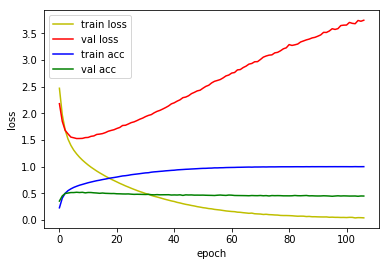

4815/4815 [==============================] - 1s 180us/sample - loss: 1.6917 - acc: 0.4621
Loss: 1.6916703453687865 Accuracy: 0.46209762

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36672/36805 [============================>.] - ETA: 0s - loss: 2.2949 - acc: 0.2574
Epoch 00001: val_loss improved from inf to 1.89528, saving model to model/checkpoint/1D_CNN_2_only_conv_checkpoint/001-1.8953.hdf5
36805/36805 [==============================] - 9s 237us/sample - loss: 2.2939 - acc: 0.2580 - val_loss: 1.8953 - val_acc: 0.3841
Epoch 2/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.8091 - acc: 0.4097
Epoch 00002: val_loss improved from 1.89528 to 1.71637, saving model to model/checkpoint/1D_CNN_2_only_conv_checkpoint/002-1.7164.hdf5
36805/36805 [==============================] - 8s 218us/sample - loss: 1.8091 - acc: 0.4097 - val_loss: 1.7164 - val_acc: 0.4475
Epoch 3/500
36736/36805 [============================>.] - ETA: 0s - loss: 1.6556 - acc: 0.4740
Ep

Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.6949 - acc: 0.7944
Epoch 00027: val_loss did not improve from 1.40458
36805/36805 [==============================] - 9s 232us/sample - loss: 0.6949 - acc: 0.7944 - val_loss: 1.5014 - val_acc: 0.5570
Epoch 28/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.6737 - acc: 0.8039
Epoch 00028: val_loss did not improve from 1.40458
36805/36805 [==============================] - 9s 243us/sample - loss: 0.6737 - acc: 0.8039 - val_loss: 1.5480 - val_acc: 0.5521
Epoch 29/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.6512 - acc: 0.8112
Epoch 00029: val_loss did not improve from 1.40458
36805/36805 [==============================] - 9s 245us/sample - loss: 0.6511 - acc: 0.8112 - val_loss: 1.5546 - val_acc: 0.5558
Epoch 30/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.6281 - acc: 0.8185
Epoch 00030: val_loss did not improve from 1.40458
36805/36805 [========

Epoch 57/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.2336 - acc: 0.9496
Epoch 00057: val_loss did not improve from 1.40458
36805/36805 [==============================] - 8s 224us/sample - loss: 0.2338 - acc: 0.9495 - val_loss: 2.1822 - val_acc: 0.5339
Epoch 58/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.2238 - acc: 0.9524
Epoch 00058: val_loss did not improve from 1.40458
36805/36805 [==============================] - 8s 215us/sample - loss: 0.2240 - acc: 0.9523 - val_loss: 2.2169 - val_acc: 0.5330
Epoch 59/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.2144 - acc: 0.9554
Epoch 00059: val_loss did not improve from 1.40458
36805/36805 [==============================] - 8s 220us/sample - loss: 0.2143 - acc: 0.9554 - val_loss: 2.2583 - val_acc: 0.5297
Epoch 60/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.2056 - acc: 0.9574
Epoch 00060: val_loss did not improve from 1.40458
36805/36805 [========

Epoch 87/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0693 - acc: 0.9929
Epoch 00087: val_loss did not improve from 1.40458
36805/36805 [==============================] - 8s 220us/sample - loss: 0.0693 - acc: 0.9928 - val_loss: 3.0555 - val_acc: 0.5264
Epoch 88/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.0743 - acc: 0.9905
Epoch 00088: val_loss did not improve from 1.40458
36805/36805 [==============================] - 8s 215us/sample - loss: 0.0743 - acc: 0.9905 - val_loss: 3.0253 - val_acc: 0.5239
Epoch 89/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.0615 - acc: 0.9944
Epoch 00089: val_loss did not improve from 1.40458
36805/36805 [==============================] - 8s 210us/sample - loss: 0.0614 - acc: 0.9944 - val_loss: 3.0561 - val_acc: 0.5232
Epoch 90/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0595 - acc: 0.9945
Epoch 00090: val_loss did not improve from 1.40458
36805/36805 [========

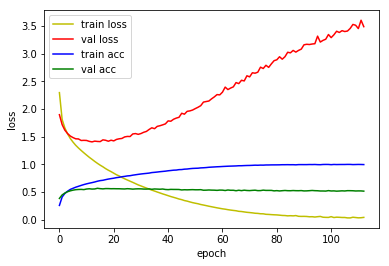

4815/4815 [==============================] - 1s 218us/sample - loss: 1.4719 - acc: 0.5321
Loss: 1.4719076889202478 Accuracy: 0.5320872

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36672/36805 [============================>.] - ETA: 0s - loss: 2.2514 - acc: 0.2573
Epoch 00001: val_loss improved from inf to 1.77898, saving model to model/checkpoint/1D_CNN_3_only_conv_checkpoint/001-1.7790.hdf5
36805/36805 [==============================] - 11s 306us/sample - loss: 2.2495 - acc: 0.2580 - val_loss: 1.7790 - val_acc: 0.4216
Epoch 2/500
36608/36805 [============================>.] - ETA: 0s - loss: 1.7404 - acc: 0.4398
Epoch 00002: val_loss improved from 1.77898 to 1.60094, saving model to model/checkpoint/1D_CNN_3_only_conv_checkpoint/002-1.6009.hdf5
36805/36805 [==============================] - 10s 268us/sample - loss: 1.7400 - acc: 0.4402 - val_loss: 1.6009 - val_acc: 0.4896
Epoch 3/500
36608/36805 [============================>.] - ETA: 0s - loss: 1.6063 - acc: 0.4938
E

Epoch 24/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.5874 - acc: 0.8300
Epoch 00024: val_loss improved from 0.76728 to 0.74663, saving model to model/checkpoint/1D_CNN_3_only_conv_checkpoint/024-0.7466.hdf5
36805/36805 [==============================] - 10s 261us/sample - loss: 0.5875 - acc: 0.8302 - val_loss: 0.7466 - val_acc: 0.7885
Epoch 25/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.5651 - acc: 0.8387
Epoch 00025: val_loss improved from 0.74663 to 0.73769, saving model to model/checkpoint/1D_CNN_3_only_conv_checkpoint/025-0.7377.hdf5
36805/36805 [==============================] - 10s 258us/sample - loss: 0.5648 - acc: 0.8388 - val_loss: 0.7377 - val_acc: 0.7899
Epoch 26/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.5492 - acc: 0.8418
Epoch 00026: val_loss did not improve from 0.73769
36805/36805 [==============================] - 9s 257us/sample - loss: 0.5490 - acc: 0.8418 - val_loss: 0.7508 - val_acc: 0.7936

Epoch 52/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.2156 - acc: 0.9431
Epoch 00052: val_loss did not improve from 0.70691
36805/36805 [==============================] - 9s 253us/sample - loss: 0.2156 - acc: 0.9431 - val_loss: 0.8366 - val_acc: 0.7955
Epoch 53/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.2065 - acc: 0.9462
Epoch 00053: val_loss did not improve from 0.70691
36805/36805 [==============================] - 9s 248us/sample - loss: 0.2074 - acc: 0.9461 - val_loss: 0.8218 - val_acc: 0.7973
Epoch 54/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1945 - acc: 0.9518
Epoch 00054: val_loss did not improve from 0.70691
36805/36805 [==============================] - 9s 247us/sample - loss: 0.1945 - acc: 0.9517 - val_loss: 0.8422 - val_acc: 0.7973
Epoch 55/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1882 - acc: 0.9518
Epoch 00055: val_loss did not improve from 0.70691
36805/36805 [========

Epoch 82/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0502 - acc: 0.9938
Epoch 00082: val_loss did not improve from 0.70691
36805/36805 [==============================] - 9s 255us/sample - loss: 0.0501 - acc: 0.9938 - val_loss: 1.2272 - val_acc: 0.7873
Epoch 83/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0414 - acc: 0.9959
Epoch 00083: val_loss did not improve from 0.70691
36805/36805 [==============================] - 9s 244us/sample - loss: 0.0414 - acc: 0.9959 - val_loss: 1.2595 - val_acc: 0.7820
Epoch 84/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.0439 - acc: 0.9945
Epoch 00084: val_loss did not improve from 0.70691
36805/36805 [==============================] - 9s 246us/sample - loss: 0.0438 - acc: 0.9945 - val_loss: 1.2874 - val_acc: 0.7834
Epoch 85/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.0497 - acc: 0.9928
Epoch 00085: val_loss did not improve from 0.70691
36805/36805 [========

Epoch 112/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0187 - acc: 0.9990
Epoch 00112: val_loss did not improve from 0.70691
36805/36805 [==============================] - 9s 249us/sample - loss: 0.0186 - acc: 0.9990 - val_loss: 1.5417 - val_acc: 0.7820
Epoch 113/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.0216 - acc: 0.9981
Epoch 00113: val_loss did not improve from 0.70691
36805/36805 [==============================] - 9s 246us/sample - loss: 0.0219 - acc: 0.9979 - val_loss: 1.7016 - val_acc: 0.7680
Epoch 114/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0384 - acc: 0.9928
Epoch 00114: val_loss did not improve from 0.70691
36805/36805 [==============================] - 9s 253us/sample - loss: 0.0383 - acc: 0.9928 - val_loss: 1.5472 - val_acc: 0.7834
Epoch 115/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0199 - acc: 0.9986
Epoch 00115: val_loss did not improve from 0.70691
36805/36805 [====

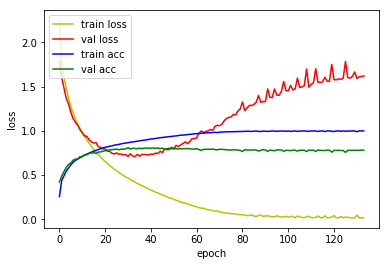

4815/4815 [==============================] - 1s 228us/sample - loss: 0.7853 - acc: 0.7747
Loss: 0.7853394545622456 Accuracy: 0.7746625

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.2511 - acc: 0.2601
Epoch 00001: val_loss improved from inf to 1.82843, saving model to model/checkpoint/1D_CNN_4_only_conv_checkpoint/001-1.8284.hdf5
36805/36805 [==============================] - 12s 337us/sample - loss: 2.2511 - acc: 0.2600 - val_loss: 1.8284 - val_acc: 0.4316
Epoch 2/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.5902 - acc: 0.5104
Epoch 00002: val_loss improved from 1.82843 to 1.36279, saving model to model/checkpoint/1D_CNN_4_only_conv_checkpoint/002-1.3628.hdf5
36805/36805 [==============================] - 11s 292us/sample - loss: 1.5892 - acc: 0.5108 - val_loss: 1.3628 - val_acc: 0.5870
Epoch 3/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.2272 - acc: 0.6312
E

Epoch 24/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2926 - acc: 0.9098
Epoch 00024: val_loss did not improve from 0.39624
36805/36805 [==============================] - 10s 283us/sample - loss: 0.2926 - acc: 0.9098 - val_loss: 0.3969 - val_acc: 0.8938
Epoch 25/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.2833 - acc: 0.9120
Epoch 00025: val_loss improved from 0.39624 to 0.38949, saving model to model/checkpoint/1D_CNN_4_only_conv_checkpoint/025-0.3895.hdf5
36805/36805 [==============================] - 10s 276us/sample - loss: 0.2833 - acc: 0.9120 - val_loss: 0.3895 - val_acc: 0.8945
Epoch 26/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.2707 - acc: 0.9167
Epoch 00026: val_loss did not improve from 0.38949
36805/36805 [==============================] - 10s 274us/sample - loss: 0.2709 - acc: 0.9167 - val_loss: 0.4039 - val_acc: 0.8926
Epoch 27/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.2610

Epoch 52/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1079 - acc: 0.9669
Epoch 00052: val_loss did not improve from 0.36979
36805/36805 [==============================] - 10s 272us/sample - loss: 0.1079 - acc: 0.9669 - val_loss: 0.4039 - val_acc: 0.9080
Epoch 53/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1074 - acc: 0.9666
Epoch 00053: val_loss did not improve from 0.36979
36805/36805 [==============================] - 10s 276us/sample - loss: 0.1074 - acc: 0.9666 - val_loss: 0.4096 - val_acc: 0.9101
Epoch 54/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1035 - acc: 0.9673
Epoch 00054: val_loss did not improve from 0.36979
36805/36805 [==============================] - 10s 271us/sample - loss: 0.1035 - acc: 0.9673 - val_loss: 0.4116 - val_acc: 0.9080
Epoch 55/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.0999 - acc: 0.9694
Epoch 00055: val_loss did not improve from 0.36979
36805/36805 [=====

Epoch 82/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0404 - acc: 0.9888
Epoch 00082: val_loss did not improve from 0.36979
36805/36805 [==============================] - 10s 267us/sample - loss: 0.0402 - acc: 0.9889 - val_loss: 0.5974 - val_acc: 0.9019
Epoch 83/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0412 - acc: 0.9883
Epoch 00083: val_loss did not improve from 0.36979
36805/36805 [==============================] - 10s 272us/sample - loss: 0.0414 - acc: 0.9882 - val_loss: 0.6274 - val_acc: 0.8987
Epoch 84/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0457 - acc: 0.9864
Epoch 00084: val_loss did not improve from 0.36979
36805/36805 [==============================] - 10s 269us/sample - loss: 0.0457 - acc: 0.9864 - val_loss: 0.5840 - val_acc: 0.9026
Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0361 - acc: 0.9899
Epoch 00085: val_loss did not improve from 0.36979
36805/36805 [=====

Epoch 112/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0165 - acc: 0.9966
Epoch 00112: val_loss did not improve from 0.36979
36805/36805 [==============================] - 10s 267us/sample - loss: 0.0166 - acc: 0.9965 - val_loss: 0.7214 - val_acc: 0.8975
Epoch 113/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0218 - acc: 0.9949
Epoch 00113: val_loss did not improve from 0.36979
36805/36805 [==============================] - 10s 266us/sample - loss: 0.0218 - acc: 0.9949 - val_loss: 0.7182 - val_acc: 0.8989
Epoch 114/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0180 - acc: 0.9960
Epoch 00114: val_loss did not improve from 0.36979
36805/36805 [==============================] - 10s 269us/sample - loss: 0.0180 - acc: 0.9960 - val_loss: 0.7155 - val_acc: 0.9001
Epoch 115/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0321 - acc: 0.9914
Epoch 00115: val_loss did not improve from 0.36979
36805/36805 [=

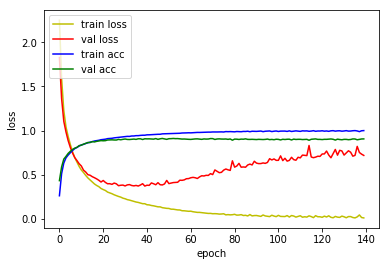

4815/4815 [==============================] - 1s 298us/sample - loss: 0.4364 - acc: 0.8866
Loss: 0.43644130462674213 Accuracy: 0.88660437

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36736/36805 [============================>.] - ETA: 0s - loss: 2.0045 - acc: 0.3501
Epoch 00001: val_loss improved from inf to 1.40957, saving model to model/checkpoint/1D_CNN_5_only_conv_checkpoint/001-1.4096.hdf5
36805/36805 [==============================] - 14s 368us/sample - loss: 2.0033 - acc: 0.3504 - val_loss: 1.4096 - val_acc: 0.5679
Epoch 2/500
36736/36805 [============================>.] - ETA: 0s - loss: 1.2565 - acc: 0.6091
Epoch 00002: val_loss improved from 1.40957 to 1.00324, saving model to model/checkpoint/1D_CNN_5_only_conv_checkpoint/002-1.0032.hdf5
36805/36805 [==============================] - 11s 306us/sample - loss: 1.2562 - acc: 0.6093 - val_loss: 1.0032 - val_acc: 0.6976
Epoch 3/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.9800 - acc: 0.6953

Epoch 25/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.1731 - acc: 0.9445
Epoch 00025: val_loss improved from 0.28586 to 0.28203, saving model to model/checkpoint/1D_CNN_5_only_conv_checkpoint/025-0.2820.hdf5
36805/36805 [==============================] - 11s 293us/sample - loss: 0.1730 - acc: 0.9445 - val_loss: 0.2820 - val_acc: 0.9194
Epoch 26/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1667 - acc: 0.9468
Epoch 00026: val_loss did not improve from 0.28203
36805/36805 [==============================] - 11s 289us/sample - loss: 0.1667 - acc: 0.9468 - val_loss: 0.2868 - val_acc: 0.9203
Epoch 27/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1528 - acc: 0.9514
Epoch 00027: val_loss improved from 0.28203 to 0.27192, saving model to model/checkpoint/1D_CNN_5_only_conv_checkpoint/027-0.2719.hdf5
36805/36805 [==============================] - 11s 292us/sample - loss: 0.1528 - acc: 0.9514 - val_loss: 0.2719 - val_acc: 0.925

Epoch 54/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0457 - acc: 0.9856
Epoch 00054: val_loss did not improve from 0.27192
36805/36805 [==============================] - 10s 281us/sample - loss: 0.0459 - acc: 0.9856 - val_loss: 0.3977 - val_acc: 0.9276
Epoch 55/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0441 - acc: 0.9864
Epoch 00055: val_loss did not improve from 0.27192
36805/36805 [==============================] - 10s 281us/sample - loss: 0.0441 - acc: 0.9864 - val_loss: 0.4759 - val_acc: 0.9143
Epoch 56/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0435 - acc: 0.9868
Epoch 00056: val_loss did not improve from 0.27192
36805/36805 [==============================] - 10s 279us/sample - loss: 0.0436 - acc: 0.9867 - val_loss: 0.4612 - val_acc: 0.9199
Epoch 57/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0500 - acc: 0.9851
Epoch 00057: val_loss did not improve from 0.27192
36805/36805 [=====

Epoch 84/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0222 - acc: 0.9946
Epoch 00084: val_loss did not improve from 0.27192
36805/36805 [==============================] - 11s 309us/sample - loss: 0.0222 - acc: 0.9946 - val_loss: 0.5599 - val_acc: 0.9185
Epoch 85/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0364 - acc: 0.9896
Epoch 00085: val_loss did not improve from 0.27192
36805/36805 [==============================] - 11s 302us/sample - loss: 0.0364 - acc: 0.9896 - val_loss: 0.4805 - val_acc: 0.9336
Epoch 86/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0164 - acc: 0.9956
Epoch 00086: val_loss did not improve from 0.27192
36805/36805 [==============================] - 11s 294us/sample - loss: 0.0164 - acc: 0.9956 - val_loss: 0.4822 - val_acc: 0.9278
Epoch 87/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0217 - acc: 0.9944
Epoch 00087: val_loss did not improve from 0.27192
36805/36805 [=====

Epoch 114/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0136 - acc: 0.9970
Epoch 00114: val_loss did not improve from 0.27192
36805/36805 [==============================] - 10s 280us/sample - loss: 0.0136 - acc: 0.9970 - val_loss: 0.4879 - val_acc: 0.9364
Epoch 115/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0068 - acc: 0.9990
Epoch 00115: val_loss did not improve from 0.27192
36805/36805 [==============================] - 10s 278us/sample - loss: 0.0068 - acc: 0.9990 - val_loss: 0.4983 - val_acc: 0.9345
Epoch 116/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0064 - acc: 0.9989
Epoch 00116: val_loss did not improve from 0.27192
36805/36805 [==============================] - 10s 277us/sample - loss: 0.0064 - acc: 0.9989 - val_loss: 0.5217 - val_acc: 0.9327
Epoch 117/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0455 - acc: 0.9883
Epoch 00117: val_loss did not improve from 0.27192
36805/36805 [=

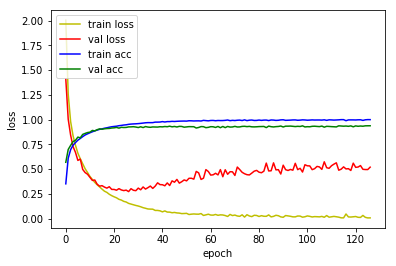

4815/4815 [==============================] - 1s 266us/sample - loss: 0.4004 - acc: 0.8870
Loss: 0.40042313160307064 Accuracy: 0.88701975



In [10]:
for i in range(1, 6):
    model_name = '1D_CNN_{}_only_conv'.format(i)
    model = build_1d_cnn_only_conv(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=100)
    hist = model.fit(x_train_abs, y_train_onehot, batch_size=64, epochs=500, 
                     validation_data=[x_val_abs, y_val_onehot], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [11]:
for i in range(1, 6):
    model_name = '1D_CNN_{}_only_conv'.format(i)
    print()
    print(model_name, 'Model')
#         model = build_cnn(conv_num=i, fcn_num=j)
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
#         model_filename = model_path + '{epoch:02d}-{val_loss:.4f}.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)


1D_CNN_1_only_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 15976, 8)          208       
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 3994, 8)           0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 31952)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                511248    
Total params: 511,456
Trainable params: 511,456
Non-trainable params: 0
_________________________________________________________________
4815/4815 [==============================] - 1s 220us/sample - loss: 1.6917 - acc: 0.4621
Loss: 1.6916703453687865 Accuracy: 0.46209762

1D_CNN_2_only_conv Model
_________________________________________________________________
Layer (type)  

In [12]:
def build_1d_cnn_DO_only_conv(conv_num=1):
    model=Sequential()
    model.add(Conv1D (kernel_size=25, filters=8, strides=1, padding='valid', 
                      activation='relu', input_shape=input_shape)) 
#     model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=4, strides=4, padding='same'))
    
    for i in range(conv_num-1):
        model.add(Conv1D (kernel_size=25, filters=8*(2**(i+1)), strides=1, padding='valid', 
                          activation='relu'))
#         model.add(BatchNormalization())
        model.add(MaxPooling1D(pool_size=4, strides=4, padding='same'))

    model.add(Flatten())
    
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax' ))
    
    return model

In [13]:
for i in range(1, 6):
    model = build_1d_cnn_DO_only_conv(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 15976, 8)          208       
_________________________________________________________________
max_pooling1d_30 (MaxPooling (None, 3994, 8)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 31952)             0         
_________________________________________________________________
dropout (Dropout)            (None, 31952)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                511248    
Total params: 511,456
Trainable params: 511,456
Non-trainable params: 0
_________________________________________________________________
_____________________

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36800/36805 [============================>.] - ETA: 0s - loss: 2.4480 - acc: 0.2370
Epoch 00001: val_loss improved from inf to 2.14335, saving model to model/checkpoint/1D_CNN_DO_1_only_conv_checkpoint/001-2.1434.hdf5
36805/36805 [==============================] - 10s 263us/sample - loss: 2.4480 - acc: 0.2370 - val_loss: 2.1434 - val_acc: 0.3648
Epoch 2/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.9919 - acc: 0.3920
Epoch 00002: val_loss improved from 2.14335 to 1.89048, saving model to model/checkpoint/1D_CNN_DO_1_only_conv_checkpoint/002-1.8905.hdf5
36805/36805 [==============================] - 7s 186us/sample - loss: 1.9919 - acc: 0.3920 - val_loss: 1.8905 - val_acc: 0.4267
Epoch 3/500
36800/36805 [============================>.] - ETA: 0s - loss: 1.7738 - acc: 0.4583
Epoch 00003: val_loss improved from 1.89048 to 1.76412, saving model to model/checkpoint/1D_CNN_DO_1_only_conv_checkpoint/003-1.7641

36736/36805 [============================>.] - ETA: 0s - loss: 0.9031 - acc: 0.7143
Epoch 00026: val_loss did not improve from 1.53402
36805/36805 [==============================] - 7s 183us/sample - loss: 0.9026 - acc: 0.7145 - val_loss: 1.5790 - val_acc: 0.5153
Epoch 27/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.8912 - acc: 0.7181
Epoch 00027: val_loss did not improve from 1.53402
36805/36805 [==============================] - 7s 183us/sample - loss: 0.8906 - acc: 0.7184 - val_loss: 1.5886 - val_acc: 0.5183
Epoch 28/500
36544/36805 [============================>.] - ETA: 0s - loss: 0.8831 - acc: 0.7190
Epoch 00028: val_loss did not improve from 1.53402
36805/36805 [==============================] - 7s 182us/sample - loss: 0.8828 - acc: 0.7192 - val_loss: 1.5779 - val_acc: 0.5278
Epoch 29/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.8753 - acc: 0.7210
Epoch 00029: val_loss did not improve from 1.53402
36805/36805 [=====================

Epoch 56/500
36544/36805 [============================>.] - ETA: 0s - loss: 0.6958 - acc: 0.7717
Epoch 00056: val_loss did not improve from 1.53402
36805/36805 [==============================] - 7s 180us/sample - loss: 0.6962 - acc: 0.7717 - val_loss: 1.7197 - val_acc: 0.5215
Epoch 57/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.6938 - acc: 0.7688
Epoch 00057: val_loss did not improve from 1.53402
36805/36805 [==============================] - 7s 182us/sample - loss: 0.6935 - acc: 0.7688 - val_loss: 1.7340 - val_acc: 0.5260
Epoch 58/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.6885 - acc: 0.7738
Epoch 00058: val_loss did not improve from 1.53402
36805/36805 [==============================] - 7s 181us/sample - loss: 0.6885 - acc: 0.7738 - val_loss: 1.7363 - val_acc: 0.5276
Epoch 59/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.6870 - acc: 0.7739
Epoch 00059: val_loss did not improve from 1.53402
36805/36805 [========

Epoch 86/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.6068 - acc: 0.7974
Epoch 00086: val_loss did not improve from 1.53402
36805/36805 [==============================] - 7s 189us/sample - loss: 0.6070 - acc: 0.7973 - val_loss: 1.8291 - val_acc: 0.5313
Epoch 87/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.6092 - acc: 0.7969
Epoch 00087: val_loss did not improve from 1.53402
36805/36805 [==============================] - 7s 188us/sample - loss: 0.6090 - acc: 0.7970 - val_loss: 1.8363 - val_acc: 0.5309
Epoch 88/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.6134 - acc: 0.7955
Epoch 00088: val_loss did not improve from 1.53402
36805/36805 [==============================] - 7s 193us/sample - loss: 0.6134 - acc: 0.7955 - val_loss: 1.8393 - val_acc: 0.5269
Epoch 89/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.6064 - acc: 0.7981
Epoch 00089: val_loss did not improve from 1.53402
36805/36805 [========

Epoch 116/500
36544/36805 [============================>.] - ETA: 0s - loss: 0.5626 - acc: 0.8113
Epoch 00116: val_loss did not improve from 1.53402
36805/36805 [==============================] - 7s 195us/sample - loss: 0.5621 - acc: 0.8115 - val_loss: 1.9025 - val_acc: 0.5332

1D_CNN_DO_1_only_conv Model


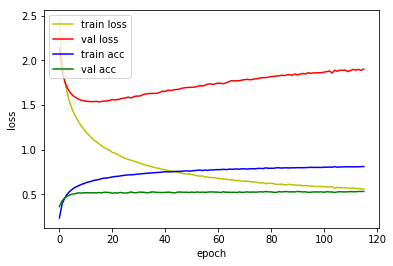

4815/4815 [==============================] - 1s 246us/sample - loss: 1.6133 - acc: 0.4889
Loss: 1.6133275957741346 Accuracy: 0.4888889

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36608/36805 [============================>.] - ETA: 0s - loss: 2.3750 - acc: 0.2350
Epoch 00001: val_loss improved from inf to 1.89725, saving model to model/checkpoint/1D_CNN_DO_2_only_conv_checkpoint/001-1.8972.hdf5
36805/36805 [==============================] - 13s 340us/sample - loss: 2.3722 - acc: 0.2359 - val_loss: 1.8972 - val_acc: 0.4221
Epoch 2/500
36608/36805 [============================>.] - ETA: 0s - loss: 1.8142 - acc: 0.4144
Epoch 00002: val_loss improved from 1.89725 to 1.66641, saving model to model/checkpoint/1D_CNN_DO_2_only_conv_checkpoint/002-1.6664.hdf5
36805/36805 [==============================] - 9s 244us/sample - loss: 1.8130 - acc: 0.4149 - val_loss: 1.6664 - val_acc: 0.4810
Epoch 3/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.6545 - acc: 0.4

Epoch 24/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.9342 - acc: 0.7148
Epoch 00024: val_loss did not improve from 1.17262
36805/36805 [==============================] - 9s 238us/sample - loss: 0.9346 - acc: 0.7147 - val_loss: 1.1757 - val_acc: 0.6448
Epoch 25/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.9175 - acc: 0.7180
Epoch 00025: val_loss improved from 1.17262 to 1.16023, saving model to model/checkpoint/1D_CNN_DO_2_only_conv_checkpoint/025-1.1602.hdf5
36805/36805 [==============================] - 9s 237us/sample - loss: 0.9176 - acc: 0.7180 - val_loss: 1.1602 - val_acc: 0.6532
Epoch 26/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.9048 - acc: 0.7232
Epoch 00026: val_loss did not improve from 1.16023
36805/36805 [==============================] - 9s 236us/sample - loss: 0.9048 - acc: 0.7235 - val_loss: 1.1622 - val_acc: 0.6513
Epoch 27/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.8929

36672/36805 [============================>.] - ETA: 0s - loss: 0.6657 - acc: 0.7919
Epoch 00050: val_loss did not improve from 1.12160
36805/36805 [==============================] - 9s 231us/sample - loss: 0.6659 - acc: 0.7918 - val_loss: 1.1319 - val_acc: 0.6790
Epoch 51/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.6611 - acc: 0.7924
Epoch 00051: val_loss did not improve from 1.12160
36805/36805 [==============================] - 8s 230us/sample - loss: 0.6611 - acc: 0.7924 - val_loss: 1.1395 - val_acc: 0.6744
Epoch 52/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.6518 - acc: 0.7938
Epoch 00052: val_loss did not improve from 1.12160
36805/36805 [==============================] - 8s 230us/sample - loss: 0.6519 - acc: 0.7938 - val_loss: 1.1370 - val_acc: 0.6762
Epoch 53/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.6418 - acc: 0.7982
Epoch 00053: val_loss did not improve from 1.12160
36805/36805 [=====================

Epoch 80/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.5077 - acc: 0.8383
Epoch 00080: val_loss did not improve from 1.12160
36805/36805 [==============================] - 8s 225us/sample - loss: 0.5074 - acc: 0.8384 - val_loss: 1.1440 - val_acc: 0.6944
Epoch 81/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.4999 - acc: 0.8386
Epoch 00081: val_loss did not improve from 1.12160
36805/36805 [==============================] - 8s 229us/sample - loss: 0.5002 - acc: 0.8385 - val_loss: 1.1385 - val_acc: 0.6960
Epoch 82/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.5010 - acc: 0.8374
Epoch 00082: val_loss did not improve from 1.12160
36805/36805 [==============================] - 8s 226us/sample - loss: 0.5016 - acc: 0.8373 - val_loss: 1.1605 - val_acc: 0.6867
Epoch 83/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.4940 - acc: 0.8412
Epoch 00083: val_loss did not improve from 1.12160
36805/36805 [========

Epoch 110/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.4078 - acc: 0.8675
Epoch 00110: val_loss did not improve from 1.12160
36805/36805 [==============================] - 9s 243us/sample - loss: 0.4081 - acc: 0.8675 - val_loss: 1.1752 - val_acc: 0.6995
Epoch 111/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4147 - acc: 0.8645
Epoch 00111: val_loss did not improve from 1.12160
36805/36805 [==============================] - 9s 247us/sample - loss: 0.4148 - acc: 0.8645 - val_loss: 1.1741 - val_acc: 0.6981
Epoch 112/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.4088 - acc: 0.8664
Epoch 00112: val_loss did not improve from 1.12160
36805/36805 [==============================] - 9s 250us/sample - loss: 0.4087 - acc: 0.8663 - val_loss: 1.1660 - val_acc: 0.7016
Epoch 113/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.4053 - acc: 0.8675
Epoch 00113: val_loss did not improve from 1.12160
36805/36805 [====

Epoch 140/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.3481 - acc: 0.8855
Epoch 00140: val_loss did not improve from 1.12160
36805/36805 [==============================] - 9s 250us/sample - loss: 0.3480 - acc: 0.8855 - val_loss: 1.1855 - val_acc: 0.7065
Epoch 141/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3524 - acc: 0.8828
Epoch 00141: val_loss did not improve from 1.12160
36805/36805 [==============================] - 9s 249us/sample - loss: 0.3525 - acc: 0.8827 - val_loss: 1.1993 - val_acc: 0.7063
Epoch 142/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.3492 - acc: 0.8858
Epoch 00142: val_loss did not improve from 1.12160
36805/36805 [==============================] - 9s 245us/sample - loss: 0.3501 - acc: 0.8855 - val_loss: 1.1938 - val_acc: 0.7032
Epoch 143/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.3478 - acc: 0.8851
Epoch 00143: val_loss did not improve from 1.12160
36805/36805 [====

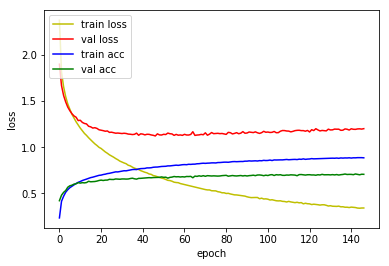

4815/4815 [==============================] - 1s 261us/sample - loss: 1.1853 - acc: 0.6449
Loss: 1.1853097205840415 Accuracy: 0.6448598

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36672/36805 [============================>.] - ETA: 0s - loss: 2.3765 - acc: 0.2160
Epoch 00001: val_loss improved from inf to 1.94982, saving model to model/checkpoint/1D_CNN_DO_3_only_conv_checkpoint/001-1.9498.hdf5
36805/36805 [==============================] - 14s 375us/sample - loss: 2.3756 - acc: 0.2163 - val_loss: 1.9498 - val_acc: 0.3769
Epoch 2/500
36608/36805 [============================>.] - ETA: 0s - loss: 1.8629 - acc: 0.3863
Epoch 00002: val_loss improved from 1.94982 to 1.63934, saving model to model/checkpoint/1D_CNN_DO_3_only_conv_checkpoint/002-1.6393.hdf5
36805/36805 [==============================] - 10s 265us/sample - loss: 1.8619 - acc: 0.3868 - val_loss: 1.6393 - val_acc: 0.4838
Epoch 3/500
36736/36805 [============================>.] - ETA: 0s - loss: 1.6639 - acc: 0.

36736/36805 [============================>.] - ETA: 0s - loss: 0.7935 - acc: 0.7641
Epoch 00023: val_loss improved from 0.81759 to 0.80881, saving model to model/checkpoint/1D_CNN_DO_3_only_conv_checkpoint/023-0.8088.hdf5
36805/36805 [==============================] - 10s 267us/sample - loss: 0.7935 - acc: 0.7640 - val_loss: 0.8088 - val_acc: 0.7619
Epoch 24/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.7766 - acc: 0.7734
Epoch 00024: val_loss improved from 0.80881 to 0.80689, saving model to model/checkpoint/1D_CNN_DO_3_only_conv_checkpoint/024-0.8069.hdf5
36805/36805 [==============================] - 10s 267us/sample - loss: 0.7766 - acc: 0.7734 - val_loss: 0.8069 - val_acc: 0.7717
Epoch 25/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.7536 - acc: 0.7755
Epoch 00025: val_loss improved from 0.80689 to 0.76695, saving model to model/checkpoint/1D_CNN_DO_3_only_conv_checkpoint/025-0.7670.hdf5
36805/36805 [==============================] - 1

Epoch 47/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.4763 - acc: 0.8569
Epoch 00047: val_loss improved from 0.58867 to 0.57924, saving model to model/checkpoint/1D_CNN_DO_3_only_conv_checkpoint/047-0.5792.hdf5
36805/36805 [==============================] - 10s 273us/sample - loss: 0.4765 - acc: 0.8568 - val_loss: 0.5792 - val_acc: 0.8388
Epoch 48/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.4625 - acc: 0.8609
Epoch 00048: val_loss did not improve from 0.57924
36805/36805 [==============================] - 10s 262us/sample - loss: 0.4629 - acc: 0.8608 - val_loss: 0.5881 - val_acc: 0.8348
Epoch 49/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.4596 - acc: 0.8616
Epoch 00049: val_loss improved from 0.57924 to 0.56216, saving model to model/checkpoint/1D_CNN_DO_3_only_conv_checkpoint/049-0.5622.hdf5
36805/36805 [==============================] - 10s 265us/sample - loss: 0.4596 - acc: 0.8615 - val_loss: 0.5622 - val_acc:

Epoch 74/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.3311 - acc: 0.8978
Epoch 00074: val_loss did not improve from 0.51918
36805/36805 [==============================] - 10s 263us/sample - loss: 0.3311 - acc: 0.8977 - val_loss: 0.5276 - val_acc: 0.8668
Epoch 75/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.3308 - acc: 0.8983
Epoch 00075: val_loss did not improve from 0.51918
36805/36805 [==============================] - 10s 264us/sample - loss: 0.3310 - acc: 0.8982 - val_loss: 0.5289 - val_acc: 0.8658
Epoch 76/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.3256 - acc: 0.8989
Epoch 00076: val_loss did not improve from 0.51918
36805/36805 [==============================] - 10s 263us/sample - loss: 0.3257 - acc: 0.8988 - val_loss: 0.5252 - val_acc: 0.8642
Epoch 77/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.3221 - acc: 0.9001
Epoch 00077: val_loss did not improve from 0.51918
36805/36805 [=====

36736/36805 [============================>.] - ETA: 0s - loss: 0.2581 - acc: 0.9179
Epoch 00103: val_loss did not improve from 0.51751
36805/36805 [==============================] - 10s 264us/sample - loss: 0.2579 - acc: 0.9180 - val_loss: 0.5303 - val_acc: 0.8740
Epoch 104/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.2589 - acc: 0.9182
Epoch 00104: val_loss did not improve from 0.51751
36805/36805 [==============================] - 10s 262us/sample - loss: 0.2586 - acc: 0.9182 - val_loss: 0.5375 - val_acc: 0.8665
Epoch 105/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.2542 - acc: 0.9186
Epoch 00105: val_loss did not improve from 0.51751
36805/36805 [==============================] - 10s 263us/sample - loss: 0.2542 - acc: 0.9186 - val_loss: 0.5479 - val_acc: 0.8642
Epoch 106/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.2508 - acc: 0.9207
Epoch 00106: val_loss did not improve from 0.51751
36805/36805 [===============

Epoch 133/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.2110 - acc: 0.9331
Epoch 00133: val_loss did not improve from 0.51751
36805/36805 [==============================] - 10s 264us/sample - loss: 0.2107 - acc: 0.9332 - val_loss: 0.5451 - val_acc: 0.8737
Epoch 134/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.2117 - acc: 0.9317
Epoch 00134: val_loss did not improve from 0.51751
36805/36805 [==============================] - 10s 264us/sample - loss: 0.2115 - acc: 0.9317 - val_loss: 0.5528 - val_acc: 0.8705
Epoch 135/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.2117 - acc: 0.9319
Epoch 00135: val_loss did not improve from 0.51751
36805/36805 [==============================] - 10s 264us/sample - loss: 0.2116 - acc: 0.9318 - val_loss: 0.5518 - val_acc: 0.8735
Epoch 136/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.2115 - acc: 0.9312
Epoch 00136: val_loss did not improve from 0.51751
36805/36805 [=

Epoch 163/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.1852 - acc: 0.9406
Epoch 00163: val_loss did not improve from 0.51751
36805/36805 [==============================] - 10s 262us/sample - loss: 0.1850 - acc: 0.9406 - val_loss: 0.5600 - val_acc: 0.8705
Epoch 164/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1788 - acc: 0.9421
Epoch 00164: val_loss did not improve from 0.51751
36805/36805 [==============================] - 10s 263us/sample - loss: 0.1787 - acc: 0.9420 - val_loss: 0.5643 - val_acc: 0.8710
Epoch 165/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.1865 - acc: 0.9383
Epoch 00165: val_loss did not improve from 0.51751
36805/36805 [==============================] - 10s 265us/sample - loss: 0.1868 - acc: 0.9383 - val_loss: 0.5662 - val_acc: 0.8703
Epoch 166/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1823 - acc: 0.9402
Epoch 00166: val_loss did not improve from 0.51751
36805/36805 [=

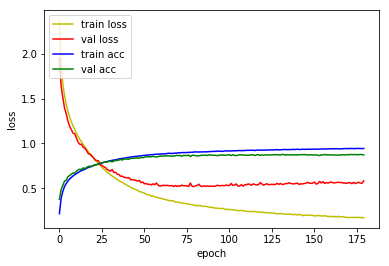

4815/4815 [==============================] - 1s 274us/sample - loss: 0.6292 - acc: 0.8239
Loss: 0.6292192858698955 Accuracy: 0.8238837

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36736/36805 [============================>.] - ETA: 0s - loss: 2.3652 - acc: 0.1938
Epoch 00001: val_loss improved from inf to 2.00466, saving model to model/checkpoint/1D_CNN_DO_4_only_conv_checkpoint/001-2.0047.hdf5
36805/36805 [==============================] - 16s 425us/sample - loss: 2.3647 - acc: 0.1941 - val_loss: 2.0047 - val_acc: 0.3739
Epoch 2/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.8197 - acc: 0.3998
Epoch 00002: val_loss improved from 2.00466 to 1.51414, saving model to model/checkpoint/1D_CNN_DO_4_only_conv_checkpoint/002-1.5141.hdf5
36805/36805 [==============================] - 11s 290us/sample - loss: 1.8197 - acc: 0.3999 - val_loss: 1.5141 - val_acc: 0.5355
Epoch 3/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.5386 - acc: 0.

36672/36805 [============================>.] - ETA: 0s - loss: 0.4774 - acc: 0.8523
Epoch 00023: val_loss improved from 0.40814 to 0.39657, saving model to model/checkpoint/1D_CNN_DO_4_only_conv_checkpoint/023-0.3966.hdf5
36805/36805 [==============================] - 10s 270us/sample - loss: 0.4770 - acc: 0.8524 - val_loss: 0.3966 - val_acc: 0.8889
Epoch 24/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.4572 - acc: 0.8555
Epoch 00024: val_loss improved from 0.39657 to 0.37916, saving model to model/checkpoint/1D_CNN_DO_4_only_conv_checkpoint/024-0.3792.hdf5
36805/36805 [==============================] - 10s 270us/sample - loss: 0.4572 - acc: 0.8555 - val_loss: 0.3792 - val_acc: 0.8973
Epoch 25/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.4406 - acc: 0.8632
Epoch 00025: val_loss improved from 0.37916 to 0.36768, saving model to model/checkpoint/1D_CNN_DO_4_only_conv_checkpoint/025-0.3677.hdf5
36805/36805 [==============================] - 1

Epoch 48/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.2608 - acc: 0.9152
Epoch 00048: val_loss did not improve from 0.26415
36805/36805 [==============================] - 10s 268us/sample - loss: 0.2608 - acc: 0.9151 - val_loss: 0.2663 - val_acc: 0.9334
Epoch 49/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.2574 - acc: 0.9182
Epoch 00049: val_loss improved from 0.26415 to 0.26240, saving model to model/checkpoint/1D_CNN_DO_4_only_conv_checkpoint/049-0.2624.hdf5
36805/36805 [==============================] - 10s 269us/sample - loss: 0.2573 - acc: 0.9182 - val_loss: 0.2624 - val_acc: 0.9287
Epoch 50/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.2520 - acc: 0.9192
Epoch 00050: val_loss improved from 0.26240 to 0.25848, saving model to model/checkpoint/1D_CNN_DO_4_only_conv_checkpoint/050-0.2585.hdf5
36805/36805 [==============================] - 10s 270us/sample - loss: 0.2524 - acc: 0.9191 - val_loss: 0.2585 - val_acc:

36608/36805 [============================>.] - ETA: 0s - loss: 0.1781 - acc: 0.9417
Epoch 00074: val_loss did not improve from 0.24066
36805/36805 [==============================] - 10s 265us/sample - loss: 0.1785 - acc: 0.9416 - val_loss: 0.2450 - val_acc: 0.9366
Epoch 75/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1785 - acc: 0.9407
Epoch 00075: val_loss improved from 0.24066 to 0.23887, saving model to model/checkpoint/1D_CNN_DO_4_only_conv_checkpoint/075-0.2389.hdf5
36805/36805 [==============================] - 10s 266us/sample - loss: 0.1782 - acc: 0.9408 - val_loss: 0.2389 - val_acc: 0.9373
Epoch 76/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.1752 - acc: 0.9416
Epoch 00076: val_loss improved from 0.23887 to 0.23872, saving model to model/checkpoint/1D_CNN_DO_4_only_conv_checkpoint/076-0.2387.hdf5
36805/36805 [==============================] - 10s 268us/sample - loss: 0.1758 - acc: 0.9414 - val_loss: 0.2387 - val_acc: 0.9390
Epoch

36736/36805 [============================>.] - ETA: 0s - loss: 0.1359 - acc: 0.9534
Epoch 00102: val_loss did not improve from 0.23317
36805/36805 [==============================] - 10s 267us/sample - loss: 0.1358 - acc: 0.9535 - val_loss: 0.2403 - val_acc: 0.9404
Epoch 103/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.1367 - acc: 0.9545
Epoch 00103: val_loss did not improve from 0.23317
36805/36805 [==============================] - 10s 267us/sample - loss: 0.1363 - acc: 0.9547 - val_loss: 0.2388 - val_acc: 0.9390
Epoch 104/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.1331 - acc: 0.9566
Epoch 00104: val_loss did not improve from 0.23317
36805/36805 [==============================] - 10s 265us/sample - loss: 0.1332 - acc: 0.9565 - val_loss: 0.2481 - val_acc: 0.9401
Epoch 105/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1337 - acc: 0.9550
Epoch 00105: val_loss did not improve from 0.23317
36805/36805 [===============

Epoch 131/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1092 - acc: 0.9618
Epoch 00131: val_loss did not improve from 0.22827
36805/36805 [==============================] - 10s 269us/sample - loss: 0.1092 - acc: 0.9618 - val_loss: 0.2395 - val_acc: 0.9422
Epoch 132/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1050 - acc: 0.9643
Epoch 00132: val_loss did not improve from 0.22827
36805/36805 [==============================] - 10s 268us/sample - loss: 0.1051 - acc: 0.9642 - val_loss: 0.2461 - val_acc: 0.9392
Epoch 133/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1078 - acc: 0.9648
Epoch 00133: val_loss did not improve from 0.22827
36805/36805 [==============================] - 10s 268us/sample - loss: 0.1078 - acc: 0.9647 - val_loss: 0.2375 - val_acc: 0.9385
Epoch 134/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1073 - acc: 0.9645
Epoch 00134: val_loss did not improve from 0.22827
36805/36805 [=

Epoch 161/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0923 - acc: 0.9692
Epoch 00161: val_loss did not improve from 0.22827
36805/36805 [==============================] - 10s 268us/sample - loss: 0.0924 - acc: 0.9691 - val_loss: 0.2511 - val_acc: 0.9413
Epoch 162/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0899 - acc: 0.9703
Epoch 00162: val_loss did not improve from 0.22827
36805/36805 [==============================] - 10s 268us/sample - loss: 0.0899 - acc: 0.9703 - val_loss: 0.2473 - val_acc: 0.9415
Epoch 163/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0861 - acc: 0.9703
Epoch 00163: val_loss did not improve from 0.22827
36805/36805 [==============================] - 10s 269us/sample - loss: 0.0861 - acc: 0.9703 - val_loss: 0.2551 - val_acc: 0.9450
Epoch 164/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0888 - acc: 0.9704
Epoch 00164: val_loss did not improve from 0.22827
36805/36805 [=

Epoch 191/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0771 - acc: 0.9739
Epoch 00191: val_loss did not improve from 0.22827
36805/36805 [==============================] - 10s 267us/sample - loss: 0.0770 - acc: 0.9739 - val_loss: 0.2476 - val_acc: 0.9422
Epoch 192/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0758 - acc: 0.9741
Epoch 00192: val_loss did not improve from 0.22827
36805/36805 [==============================] - 10s 268us/sample - loss: 0.0757 - acc: 0.9741 - val_loss: 0.2504 - val_acc: 0.9422
Epoch 193/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.0737 - acc: 0.9752
Epoch 00193: val_loss did not improve from 0.22827
36805/36805 [==============================] - 10s 263us/sample - loss: 0.0738 - acc: 0.9751 - val_loss: 0.2607 - val_acc: 0.9415
Epoch 194/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0763 - acc: 0.9735
Epoch 00194: val_loss did not improve from 0.22827
36805/36805 [=

Epoch 221/500
36608/36805 [============================>.] - ETA: 0s - loss: 0.0660 - acc: 0.9782
Epoch 00221: val_loss did not improve from 0.22827
36805/36805 [==============================] - 10s 267us/sample - loss: 0.0662 - acc: 0.9782 - val_loss: 0.2646 - val_acc: 0.9434
Epoch 222/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0678 - acc: 0.9769
Epoch 00222: val_loss did not improve from 0.22827
36805/36805 [==============================] - 10s 266us/sample - loss: 0.0680 - acc: 0.9769 - val_loss: 0.2783 - val_acc: 0.9432
Epoch 223/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0643 - acc: 0.9778
Epoch 00223: val_loss did not improve from 0.22827
36805/36805 [==============================] - 10s 266us/sample - loss: 0.0643 - acc: 0.9778 - val_loss: 0.2589 - val_acc: 0.9469

1D_CNN_DO_4_only_conv Model


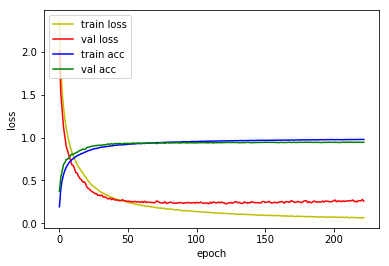

4815/4815 [==============================] - 1s 294us/sample - loss: 0.2863 - acc: 0.9215
Loss: 0.2863192579363737 Accuracy: 0.9214953

Train on 36805 samples, validate on 4293 samples
Epoch 1/500
36736/36805 [============================>.] - ETA: 0s - loss: 2.2267 - acc: 0.2684
Epoch 00001: val_loss improved from inf to 1.53086, saving model to model/checkpoint/1D_CNN_DO_5_only_conv_checkpoint/001-1.5309.hdf5
36805/36805 [==============================] - 17s 450us/sample - loss: 2.2258 - acc: 0.2688 - val_loss: 1.5309 - val_acc: 0.5355
Epoch 2/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.4953 - acc: 0.5172
Epoch 00002: val_loss improved from 1.53086 to 1.08238, saving model to model/checkpoint/1D_CNN_DO_5_only_conv_checkpoint/002-1.0824.hdf5
36805/36805 [==============================] - 11s 293us/sample - loss: 1.4948 - acc: 0.5175 - val_loss: 1.0824 - val_acc: 0.6792
Epoch 3/500
36672/36805 [============================>.] - ETA: 0s - loss: 1.1551 - acc: 0.

Epoch 24/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.2842 - acc: 0.9084
Epoch 00024: val_loss improved from 0.23819 to 0.23324, saving model to model/checkpoint/1D_CNN_DO_5_only_conv_checkpoint/024-0.2332.hdf5
36805/36805 [==============================] - 11s 294us/sample - loss: 0.2841 - acc: 0.9084 - val_loss: 0.2332 - val_acc: 0.9311
Epoch 25/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.2774 - acc: 0.9104
Epoch 00025: val_loss improved from 0.23324 to 0.21627, saving model to model/checkpoint/1D_CNN_DO_5_only_conv_checkpoint/025-0.2163.hdf5
36805/36805 [==============================] - 11s 295us/sample - loss: 0.2773 - acc: 0.9105 - val_loss: 0.2163 - val_acc: 0.9369
Epoch 26/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.2653 - acc: 0.9154
Epoch 00026: val_loss did not improve from 0.21627
36805/36805 [==============================] - 11s 292us/sample - loss: 0.2659 - acc: 0.9152 - val_loss: 0.2228 - val_acc:

36800/36805 [============================>.] - ETA: 0s - loss: 0.1453 - acc: 0.9511
Epoch 00050: val_loss did not improve from 0.18353
36805/36805 [==============================] - 11s 288us/sample - loss: 0.1453 - acc: 0.9511 - val_loss: 0.1967 - val_acc: 0.9453
Epoch 51/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1381 - acc: 0.9537
Epoch 00051: val_loss did not improve from 0.18353
36805/36805 [==============================] - 11s 289us/sample - loss: 0.1380 - acc: 0.9538 - val_loss: 0.1945 - val_acc: 0.9488
Epoch 52/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.1435 - acc: 0.9523
Epoch 00052: val_loss did not improve from 0.18353
36805/36805 [==============================] - 11s 290us/sample - loss: 0.1434 - acc: 0.9523 - val_loss: 0.1898 - val_acc: 0.9483
Epoch 53/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.1331 - acc: 0.9553
Epoch 00053: val_loss did not improve from 0.18353
36805/36805 [==================

36736/36805 [============================>.] - ETA: 0s - loss: 0.0905 - acc: 0.9698
Epoch 00079: val_loss did not improve from 0.18050
36805/36805 [==============================] - 11s 292us/sample - loss: 0.0906 - acc: 0.9698 - val_loss: 0.1995 - val_acc: 0.9509
Epoch 80/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0859 - acc: 0.9704
Epoch 00080: val_loss did not improve from 0.18050
36805/36805 [==============================] - 11s 292us/sample - loss: 0.0859 - acc: 0.9704 - val_loss: 0.2177 - val_acc: 0.9492
Epoch 81/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0821 - acc: 0.9719
Epoch 00081: val_loss did not improve from 0.18050
36805/36805 [==============================] - 11s 292us/sample - loss: 0.0821 - acc: 0.9719 - val_loss: 0.2046 - val_acc: 0.9513
Epoch 82/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0825 - acc: 0.9715
Epoch 00082: val_loss did not improve from 0.18050
36805/36805 [==================

Epoch 109/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0605 - acc: 0.9791
Epoch 00109: val_loss did not improve from 0.18050
36805/36805 [==============================] - 11s 289us/sample - loss: 0.0605 - acc: 0.9792 - val_loss: 0.2129 - val_acc: 0.9532
Epoch 110/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0625 - acc: 0.9782
Epoch 00110: val_loss did not improve from 0.18050
36805/36805 [==============================] - 11s 288us/sample - loss: 0.0625 - acc: 0.9782 - val_loss: 0.2176 - val_acc: 0.9520
Epoch 111/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0637 - acc: 0.9787
Epoch 00111: val_loss did not improve from 0.18050
36805/36805 [==============================] - 11s 289us/sample - loss: 0.0637 - acc: 0.9787 - val_loss: 0.2136 - val_acc: 0.9506
Epoch 112/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0604 - acc: 0.9791
Epoch 00112: val_loss did not improve from 0.18050
36805/36805 [=

Epoch 139/500
36736/36805 [============================>.] - ETA: 0s - loss: 0.0450 - acc: 0.9848
Epoch 00139: val_loss did not improve from 0.18050
36805/36805 [==============================] - 11s 290us/sample - loss: 0.0450 - acc: 0.9848 - val_loss: 0.2184 - val_acc: 0.9532
Epoch 140/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0495 - acc: 0.9831
Epoch 00140: val_loss did not improve from 0.18050
36805/36805 [==============================] - 11s 290us/sample - loss: 0.0498 - acc: 0.9830 - val_loss: 0.2241 - val_acc: 0.9534
Epoch 141/500
36672/36805 [============================>.] - ETA: 0s - loss: 0.0452 - acc: 0.9849
Epoch 00141: val_loss did not improve from 0.18050
36805/36805 [==============================] - 11s 290us/sample - loss: 0.0453 - acc: 0.9848 - val_loss: 0.2228 - val_acc: 0.9557
Epoch 142/500
36800/36805 [============================>.] - ETA: 0s - loss: 0.0458 - acc: 0.9849
Epoch 00142: val_loss did not improve from 0.18050
36805/36805 [=

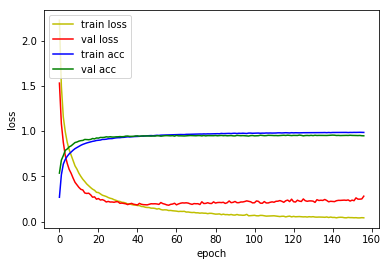

4815/4815 [==============================] - 1s 307us/sample - loss: 0.2600 - acc: 0.9277
Loss: 0.2600180074123826 Accuracy: 0.92772585



In [14]:
for i in range(1, 6):
    model_name = '1D_CNN_DO_{}_only_conv'.format(i)
    model = build_1d_cnn_DO_only_conv(conv_num=i)
#         model.summary()
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=100)
    hist = model.fit(x_train_abs, y_train_onehot, batch_size=64, epochs=500, 
                     validation_data=[x_val_abs, y_val_onehot], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [15]:
for i in range(1, 6):
    model_name = '1D_CNN_DO_{}_only_conv'.format(i)
    print()
    print(model_name, 'Model')
#         model = build_cnn(conv_num=i, fcn_num=j)
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
#         model_filename = model_path + '{epoch:02d}-{val_loss:.4f}.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test_abs, y_test_onehot)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)


1D_CNN_DO_1_only_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_45 (Conv1D)           (None, 15976, 8)          208       
_________________________________________________________________
max_pooling1d_45 (MaxPooling (None, 3994, 8)           0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 31952)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 31952)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                511248    
Total params: 511,456
Trainable params: 511,456
Non-trainable params: 0
_________________________________________________________________
4815/4815 [==============================] - 1s 270us/sample - loss: 1.6133 - acc: 0.4889
Loss: 1.613327595

4815/4815 [==============================] - 2s 334us/sample - loss: 0.2600 - acc: 0.9277
Loss: 0.2600180074123826 Accuracy: 0.92772585
